<a href="https://colab.research.google.com/github/AhamedShimak/My-AI-Projects/blob/main/happy_or_sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT AND MY DEFINED FUNCTIONS

### Imports

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets

from tqdm.auto import tqdm
import sklearn
from sklearn.model_selection import train_test_split



###My functions

In [2]:
## Visualization #####################
########################################################################################
########################################################################################

def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

########################################################################################
def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


########################################################################################
def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})


In [3]:
## operations ##############################
########################################################################################
########################################################################################

def accu(y_pred,y_test):
  correct=torch.eq(y_pred.squeeze(),y_test.squeeze()).sum().item()
  accuracy=(correct/len(y_test))*100
  return accuracy

def details_plot_scatter(x_train, x_test, y_train, y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.BrBG, s=4, label="Training data")
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=60, label="Test data")
  plt.legend(prop={"size": 14});
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(x_test[:,0],x_test[:,1],c=predictions, s=20, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 14});

########################################################################################

#traning function 
def train(
    train_dataloader,
    model,
    loss_func,
    optimizer,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  train_loss=0
  train_loss_track=[]
  train_accuracy=0

  #train mode
  model=model.to(device)
  model.train()

  #training loop
  for batch, (X,y) in tqdm(enumerate(train_dataloader)):
    #device set
    X,y=X.to(device),y.to(device)

    

    #forward propegation
    predict=model(X)
    #loss calcilation
    loss=loss_func(predict,y)
    

    train_loss_track.append(loss.detach().item())

    #clear passed gradients
    optimizer.zero_grad()
    #back propogation
    loss.backward()
    #update new values for weight and bias
    optimizer.step()

    #print(loss,batch)
    train_loss_track.append(loss.detach().item())
    
    train_loss+=loss_func(predict,y)
    train_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  train_loss=train_loss/len(train_dataloader)
  train_accuracy=train_accuracy/len(train_dataloader)

  print(f"Training loss: {train_loss:.5f} Train_accuracy {train_accuracy:.2f}")

########################################################################################

#testing function

def test(
    test_dataloader,
    model,
    loss_func,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  test_loss=0
  test_loss_track=[]
  test_accuracy=0

  #testing loop
  model.eval()

  with torch.inference_mode():
    for batch, (X,y) in tqdm(enumerate(test_dataloader)):
      #device set
      X,y=X.to(device),y.to(device)

      
      #forward propegation
      predict=model(X)
      #loss calcilation
      loss=loss_func(predict,y)
      

      test_loss_track.append(loss.detach().item())

      #print(loss,batch)
      test_loss_track.append(loss.detach().item())
      
      test_loss+=loss_func(predict,y)
      test_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  test_loss=loss/len(test_dataloader)
  test_accuracy=test_accuracy/len(test_dataloader)

  print(f"Testing loss: {test_loss:.5f} Test_accuracy {test_accuracy:.2f}")

########################################################################################

#evaluation function   
def evaluate(model:torch.nn.Module,
             loss_func:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             accu
             ):
  model_name=model.__class__.__name__
  model.eval()
  loss,accuracy=0,0
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      predict=model(x)
      loss+=loss_func(predict,y)
      accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  loss=loss/len(data_loader)
  accuracy=accuracy/len(data_loader)
  return {"Model Name":model_name,"Accuracy":accuracy,"Loss":loss.item()}



In [104]:
import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})

import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



def accu(y_pred,y_test):
  correct=torch.eq(y_pred.squeeze(),y_test.squeeze()).sum().item()
  accuracy=(correct/len(y_test))*100
  return accuracy

def details_plot_scatter(x_train, x_test, y_train, y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.BrBG, s=4, label="Training data")
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=60, label="Test data")
  plt.legend(prop={"size": 14});
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(x_test[:,0],x_test[:,1],c=predictions, s=20, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 14});



#traning function #####################################
def training(
    train_dataloader,
    model,
    loss_func,
    optimizer,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  train_loss=0
  train_loss_track=[]
  train_accuracy=0

  #train mode
  model=model.to(device)
  model.train()

  #training loop
  for batch, (X,y) in tqdm(enumerate(train_dataloader)):
    #device set
    X,y=X.to(device),y.to(device)

    

    #forward propegation
    predict=model(X)
    #loss calcilation
    loss=loss_func(predict,y)
    

    train_loss_track.append(loss.detach().item())

    #clear passed gradients
    optimizer.zero_grad()
    #back propogation
    loss.backward()
    #update new values for weight and bias
    optimizer.step()

    #print(loss,batch)
    train_loss_track.append(loss.detach().item())
    
    train_loss+=loss_func(predict,y)
    train_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  train_loss=train_loss/len(train_dataloader)
  train_accuracy=train_accuracy/len(train_dataloader)

  print(f"Training loss: {train_loss:.5f} Train_accuracy {train_accuracy:.2f}")

  
#testing function##################################
def testing(
    test_dataloader,
    model,
    loss_func,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  test_loss=0
  test_loss_track=[]
  test_accuracy=0

  #testing loop
  model.eval()

  with torch.inference_mode():
    for batch, (X,y) in tqdm(enumerate(test_dataloader)):
      #device set
      X,y=X.to(device),y.to(device)

      
      #forward propegation
      predict=model(X)
      #loss calcilation
      loss=loss_func(predict,y)
      

      test_loss_track.append(loss.detach().item())

      #print(loss,batch)
      test_loss_track.append(loss.detach().item())
      
      test_loss+=loss_func(predict,y)
      test_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  test_loss=test_loss/len(test_dataloader)
  test_accuracy=test_accuracy/len(test_dataloader)

  print(f"Testing loss: {test_loss:.5f} Test_accuracy {test_accuracy:.2f}")

#evaluation function ############################  
def evaluate(model:torch.nn.Module,
             loss_func:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             accu,
             device
             ):
  model_name=model.__class__.__name__
  model.eval()
  loss,accuracy=0,0
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      predict=model(x)
      loss+=loss_func(predict,y)
      accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  loss=loss/len(data_loader)
  accuracy=accuracy/len(data_loader)
  return {"Model Name":model_name,"Accuracy":accuracy,"Loss":loss.item()}



###GPU

In [5]:
!nvidia-smi
print(torch.cuda.is_available())
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

/bin/bash: nvidia-smi: command not found
False
cpu


##DATA PROCESS 


ex- tensor data-> x_train,y_train,x_test,y_test


In [6]:
# cvideo to image


In [182]:
import cv2

def convert_video_to_images(video_path, output_path):
    video_capture = cv2.VideoCapture(video_path)
    frame_count = 0

    while True:
        success, frame = video_capture.read()
        if not success:
            break

        output_file = f"{output_path}/{frame_count}.jpg"
        cv2.imwrite(output_file, frame)

        frame_count += 1

    video_capture.release()

# Usage example

convert_video_to_images("happy.mp4", output_path="/content/data_3/happy")
convert_video_to_images("sad.mp4", output_path="/content/data_3/sad")



In [107]:

def vid_to_tensor(vid_path):
  import cv2
  video_capture = cv2.VideoCapture(vid_path)
  tensor_name=[]
  frame_count = 0
  while True:
    success, frame = video_capture.read()
    if not success:
        break
    tensor_name.append(frame)
    #output_file = f"{output_path}/00{frame_count}.jpg"
    #cv2.imwrite(output_file, frame)
    frame_count += 1
  video_capture.release()
  print(f"Total pictures: {frame_count}")
  return tensor_name

happy=torch.from_numpy(np.array(vid_to_tensor("happy.mp4")))
sad=torch.from_numpy(np.array(vid_to_tensor("sad.mp4")))



Total pictures: 156
Total pictures: 193


##Direct load

In [108]:
img_2=np.asarray(happy[29])


(-0.5, 479.5, 851.5, -0.5)

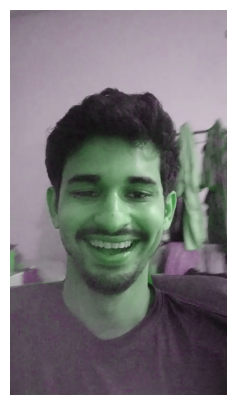

In [109]:
test=img_2
test[:,:,0]=img_2[:,:,1]
test[:,:,1]=img_2[:,:,2]
test[:,:,2]=img_2[:,:,0]

img_2=test
plt.figure(figsize=(5,5))
plt.imshow(img_2)
plt.axis(False)

In [110]:
sample_img=happy[60]

In [111]:
happy.shape

torch.Size([156, 852, 480, 3])

In [112]:
new=sample_img/255

In [113]:
new.shape

torch.Size([852, 480, 3])

In [114]:
new_2=new.permute(2,0,1)

In [115]:
new_2.shape

torch.Size([3, 852, 480])

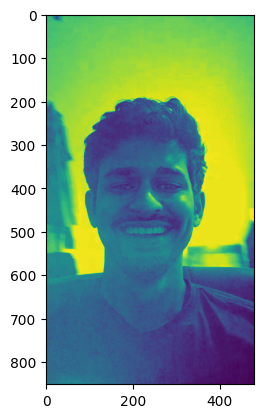

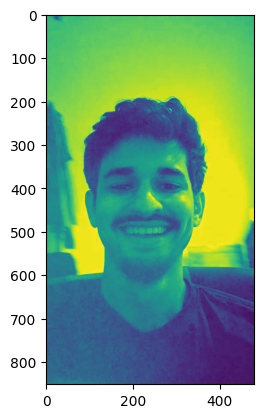

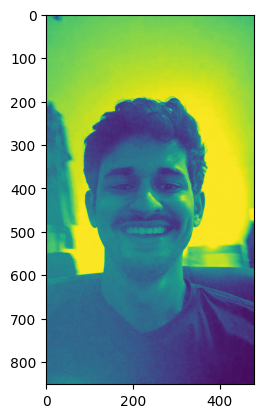

In [116]:
plt.imshow(new_2[0])
plt.show()
plt.imshow(new_2[2])
plt.show()
plt.imshow(new_2[1])
plt.show()

In [117]:
#data_whole_set_process

happy.shape,sad.shape
#transform to 0-1
happy_tr,sad_tr=happy/255 ,sad/255
happy_set=happy_tr.permute(0,3,1,2)
sad_set=sad_tr.permute(0,3,1,2)

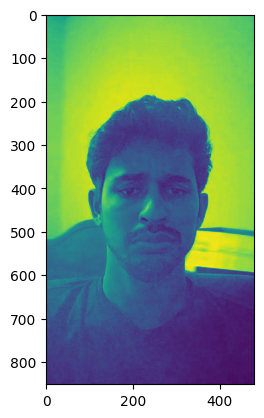

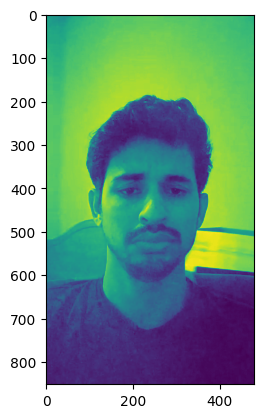

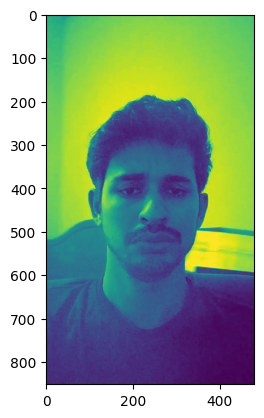

In [118]:
img=sad_set[50]
plt.imshow(img[0])
plt.show()
plt.imshow(img[2])
plt.show()
plt.imshow(img[1])
plt.show()

In [119]:
y=torch.cat((torch.ones(len(happy_set)),torch.zeros(len(sad_set))),dim=0)
x=torch.cat((happy_set,sad_set),dim=0)

tensor(0.)


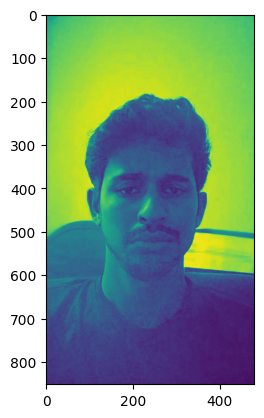

In [120]:
n=204
print(y[n])
plt.imshow(x[n][0])
plt.show()

In [121]:
perm = torch.randperm(len(y))
x,y=x[perm],y[perm]

In [122]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature data and 'y' is your target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

tensor(1.)

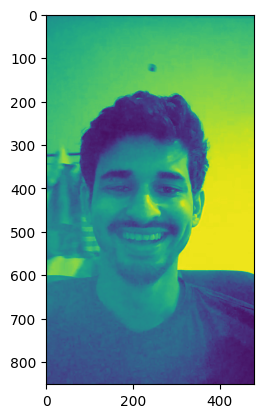

In [123]:
n=4
plt.imshow(x_test[n][2])
y_test[n]

In [124]:
# plot and visualize it

(torch.cat((sad_set,happy_set),dim=0)).shape

torch.Size([349, 3, 852, 480])

In [26]:
#prepared_data_set

torch.utils.data.Dataset -> torch.utils.data.DataLoader

##Image folder

###Transforms

In [140]:
import torchvision.transforms as transforms
data_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize image to (224, 224)
    #transforms.TrivialAugmentWide(2),

    transforms.ToTensor(),  # Convert PIL image to tensor
    #transforms.RandomHorizontalFlip(0.5) # Normalize image tensor
])

In [141]:
from torchvision import datasets

data=datasets.ImageFolder(root="/content/data_2/",transform=data_transform, target_transform=None)

In [142]:
data

Dataset ImageFolder
    Number of datapoints: 349
    Root location: /content/data_2/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [143]:
data.classes

['happy', 'sad']

In [144]:
int(len(data)*0.8)

279

In [145]:
type(data)

torchvision.datasets.folder.ImageFolder

###DATA LOADER SPLIT

In [146]:
train_dataset, test_dataset = torch.utils.data.random_split(data, [int(len(data)*0.8), int(len(data)-int(len(data)*0.8))])

In [147]:
int(len(data)*0.8),(len(data)-int(len(data)*0.8))

(279, 70)

In [148]:
train_dataset.dataset.classes,test_dataset.dataset.classes

(['happy', 'sad'], ['happy', 'sad'])

In [149]:
len(test_dataset.dataset.targets),len(train_dataset.dataset.targets)

(349, 349)

In [150]:
len(train_dataset.dataset.targets)

349

In [151]:
train_dataset.dataset

Dataset ImageFolder
    Number of datapoints: 349
    Root location: /content/data_2/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

data loader

In [152]:
batch_size = 32
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [153]:
(x,y)=next(iter(test_data_loader))
x.shape,y.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [154]:
for batch,(img,label) in enumerate(test_data_loader):
  print(label)

tensor([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 1])
tensor([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 1])
tensor([0, 1, 0, 0, 0, 0])


(-0.5, 127.5, 127.5, -0.5)

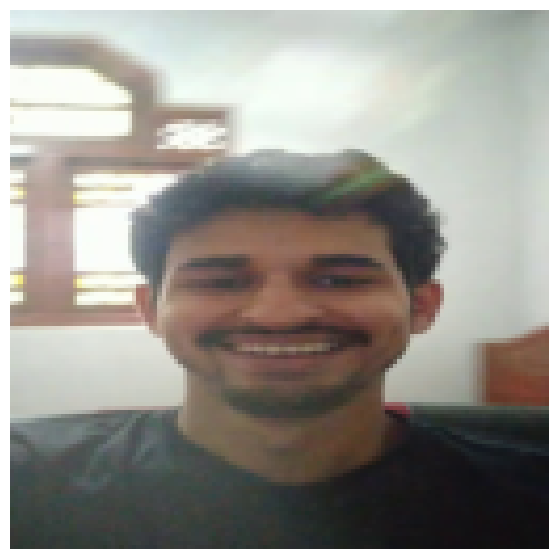

In [155]:
plt.figure(figsize=(7,7))
plt.imshow(img[0].permute(1,2,0))
plt.axis(False)

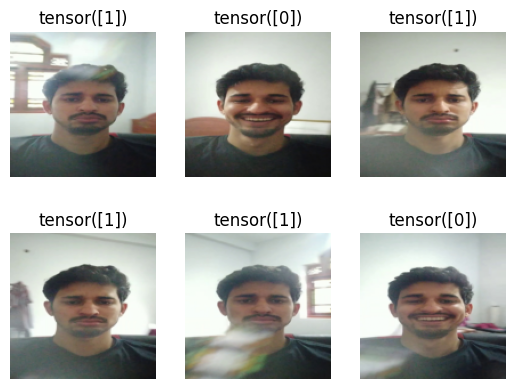

In [156]:
train_dataset_visul = DataLoader(train_dataset, batch_size=1, shuffle=True)
count=0
for i,(target_sample,label) in enumerate(train_dataset_visul):
  if i%50==0:
    plt.subplot(2,3,count+1)
    plt.axis(False)
    plt.title(label)
    plt.imshow(target_sample.squeeze().permute(1,2,0))
    count+=1
    

##Augmentation // transform
##SOTA (state of the art)

##CREATE OPTIMIZER / LOSS_FUNC

##BUILDING THE MODEL


tips
1. torch.nn.find_suitable_loss
2. torch.nn.Paramenter
3. torch.nn.Module this is base class
4. torch.optim - optimizer

In [52]:
#model
class TinyVGG(nn.Module):
  def __init__(self,in_,hidden,out_):
    super().__init__()
    #model_structer
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_,hidden,3,1,1),
        nn.ReLU(),
        nn.Conv2d(hidden,hidden,3,1,1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(hidden,hidden,3,1,1),
        nn.ReLU(),
        nn.Conv2d(hidden,hidden,3,1,1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.out_layer=nn.Sequential(
        nn.Flatten(),
        nn.Linear(2560,out_)
    )

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.out_layer(self.conv_block_2(self.conv_block_1(x)))



#discription of model
model1=TinyVGG(in_=3,out_=2,hidden=10).to(device)
model1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

In [175]:
#model_2
class TinyVGG_1(nn.Module):
  def __init__(self,in_,hidden,out_):
    super().__init__()
    #model_structer
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_,hidden,3,1,1),
        nn.ReLU(),
        nn.Conv2d(hidden,hidden,3,1,1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(hidden,hidden,3,1,1),
        nn.ReLU(),
        nn.Conv2d(hidden,hidden,3,1,1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.out_layer=nn.Sequential(
        nn.Flatten(),
        nn.Linear(20480,out_)
    )

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.out_layer(self.conv_block_2(self.conv_block_1(x)))



#discription of model
model2=TinyVGG_1(in_=3,out_=2,hidden=20).to(device)
model2

TinyVGG_1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=20480, out_features=2, bias=True)
  )
)

In [176]:
#make inference/prediction and visualize the model
with torch.inference_mode():
  dumm=torch.randn(32,3,128,128).to(device)
  print(model2(dumm))

tensor([[0.1405, 0.0956],
        [0.1557, 0.0828],
        [0.1526, 0.0905],
        [0.1484, 0.0961],
        [0.1396, 0.0909],
        [0.1433, 0.0960],
        [0.1477, 0.0998],
        [0.1458, 0.0935],
        [0.1443, 0.0899],
        [0.1396, 0.1080],
        [0.1531, 0.0929],
        [0.1403, 0.0907],
        [0.1403, 0.0972],
        [0.1460, 0.0926],
        [0.1519, 0.0764],
        [0.1510, 0.0952],
        [0.1561, 0.0983],
        [0.1409, 0.0970],
        [0.1526, 0.0842],
        [0.1251, 0.0894],
        [0.1394, 0.1032],
        [0.1452, 0.0981],
        [0.1614, 0.0927],
        [0.1492, 0.0973],
        [0.1393, 0.0984],
        [0.1504, 0.0781],
        [0.1472, 0.0946],
        [0.1534, 0.0919],
        [0.1396, 0.0981],
        [0.1566, 0.0984],
        [0.1509, 0.0962],
        [0.1505, 0.0851]])


In [54]:
#create loss func

#optimizer



In [162]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [177]:
from torchinfo import summary
summary(model2,input_size=(32,3,128,128))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG_1                                [32, 2]                   --
├─Sequential: 1-1                        [32, 20, 64, 64]          --
│    └─Conv2d: 2-1                       [32, 20, 128, 128]        560
│    └─ReLU: 2-2                         [32, 20, 128, 128]        --
│    └─Conv2d: 2-3                       [32, 20, 128, 128]        3,620
│    └─ReLU: 2-4                         [32, 20, 128, 128]        --
│    └─MaxPool2d: 2-5                    [32, 20, 64, 64]          --
├─Sequential: 1-2                        [32, 20, 32, 32]          --
│    └─Conv2d: 2-6                       [32, 20, 64, 64]          3,620
│    └─ReLU: 2-7                         [32, 20, 64, 64]          --
│    └─Conv2d: 2-8                       [32, 20, 64, 64]          3,620
│    └─ReLU: 2-9                         [32, 20, 64, 64]          --
│    └─MaxPool2d: 2-10                   [32, 20, 32, 32]          --
├─Seq

In [ ]:
train_data_loader 

##TRAINING / TESTING LOOP

tips
0. Loop throug the data
1. set to training mode
2. Forward pass
3. Calculate the loss(pred to ground truth)
4. optimizer zer grad
5. loss backward .. back propogation
6. optimizer step - use opt and adjust parameter ... grad desent


In [178]:
#model
model=model1

#create loss func
loss_func=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

for epoch in tqdm(range(40)):
  print(f"######################################################## epoch {epoch}")
  training(train_data_loader,model,loss_func,optimizer,accu,device)
  testing(test_data_loader,model,loss_func,accu,device)
  print("########################################################")

  0%|          | 0/40 [00:00<?, ?it/s]

######################################################## epoch 0


0it [00:00, ?it/s]

RuntimeError: ignored

In [181]:
#model
model=model2

#create loss func
loss_func=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.Adam(model.parameters(),lr=0.1)

for epoch in tqdm(range(40)):
  print(f"######################################################## epoch {epoch}")
  training(train_data_loader,model,loss_func,optimizer,accu,device)
  testing(test_data_loader,model,loss_func,accu,device)
  print("########################################################")

  0%|          | 0/40 [00:00<?, ?it/s]

######################################################## epoch 0


0it [00:00, ?it/s]

Training loss: 0.68825 Train_accuracy 56.48


0it [00:00, ?it/s]

Testing loss: 0.72220 Test_accuracy 43.06
########################################################
######################################################## epoch 1


0it [00:00, ?it/s]

Training loss: 0.68923 Train_accuracy 55.66


0it [00:00, ?it/s]

Testing loss: 0.72926 Test_accuracy 43.06
########################################################
######################################################## epoch 2


0it [00:00, ?it/s]

Training loss: 0.68830 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.70608 Test_accuracy 43.06
########################################################
######################################################## epoch 3


0it [00:00, ?it/s]

Training loss: 0.68510 Train_accuracy 56.34


0it [00:00, ?it/s]

Testing loss: 0.72311 Test_accuracy 43.06
########################################################
######################################################## epoch 4


0it [00:00, ?it/s]

Training loss: 0.69028 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.72027 Test_accuracy 43.06
########################################################
######################################################## epoch 5


0it [00:00, ?it/s]

Training loss: 0.69110 Train_accuracy 56.34


0it [00:00, ?it/s]

Testing loss: 0.72584 Test_accuracy 43.06
########################################################
######################################################## epoch 6


0it [00:00, ?it/s]

Training loss: 0.68815 Train_accuracy 56.34


0it [00:00, ?it/s]

Testing loss: 0.71287 Test_accuracy 43.06
########################################################
######################################################## epoch 7


0it [00:00, ?it/s]

Training loss: 0.68787 Train_accuracy 56.34


0it [00:00, ?it/s]

Testing loss: 0.71575 Test_accuracy 43.06
########################################################
######################################################## epoch 8


0it [00:00, ?it/s]

Training loss: 0.69357 Train_accuracy 55.80


0it [00:00, ?it/s]

Testing loss: 0.73629 Test_accuracy 43.06
########################################################
######################################################## epoch 9


0it [00:00, ?it/s]

Training loss: 0.69024 Train_accuracy 55.53


0it [00:00, ?it/s]

Testing loss: 0.70371 Test_accuracy 43.06
########################################################
######################################################## epoch 10


0it [00:00, ?it/s]

Training loss: 0.68816 Train_accuracy 55.93


0it [00:00, ?it/s]

Testing loss: 0.72144 Test_accuracy 43.06
########################################################
######################################################## epoch 11


0it [00:00, ?it/s]

Training loss: 0.69479 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.71010 Test_accuracy 43.06
########################################################
######################################################## epoch 12


0it [00:00, ?it/s]

Training loss: 0.68427 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.73881 Test_accuracy 43.06
########################################################
######################################################## epoch 13


0it [00:00, ?it/s]

Training loss: 0.68870 Train_accuracy 55.93


0it [00:00, ?it/s]

Testing loss: 0.72127 Test_accuracy 43.06
########################################################
######################################################## epoch 14


0it [00:00, ?it/s]

Training loss: 0.68646 Train_accuracy 56.34


0it [00:00, ?it/s]

Testing loss: 0.70410 Test_accuracy 43.06
########################################################
######################################################## epoch 15


0it [00:00, ?it/s]

Training loss: 0.68699 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.72156 Test_accuracy 43.06
########################################################
######################################################## epoch 16


0it [00:00, ?it/s]

Training loss: 0.69002 Train_accuracy 55.66


0it [00:00, ?it/s]

Testing loss: 0.73647 Test_accuracy 43.06
########################################################
######################################################## epoch 17


0it [00:00, ?it/s]

Training loss: 0.69512 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.69815 Test_accuracy 43.06
########################################################
######################################################## epoch 18


0it [00:00, ?it/s]

Training loss: 0.69584 Train_accuracy 55.93


0it [00:00, ?it/s]

Testing loss: 0.73437 Test_accuracy 43.06
########################################################
######################################################## epoch 19


0it [00:00, ?it/s]

Training loss: 0.68627 Train_accuracy 55.93


0it [00:00, ?it/s]

Testing loss: 0.70580 Test_accuracy 43.06
########################################################
######################################################## epoch 20


0it [00:00, ?it/s]

Training loss: 0.68856 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.71383 Test_accuracy 43.06
########################################################
######################################################## epoch 21


0it [00:00, ?it/s]

Training loss: 0.68790 Train_accuracy 55.53


0it [00:00, ?it/s]

Testing loss: 0.71417 Test_accuracy 43.06
########################################################
######################################################## epoch 22


0it [00:00, ?it/s]

Training loss: 0.68735 Train_accuracy 55.66


0it [00:00, ?it/s]

Testing loss: 0.71252 Test_accuracy 43.06
########################################################
######################################################## epoch 23


0it [00:00, ?it/s]

Training loss: 0.69132 Train_accuracy 55.80


0it [00:00, ?it/s]

Testing loss: 0.71804 Test_accuracy 43.06
########################################################
######################################################## epoch 24


0it [00:00, ?it/s]

Training loss: 0.68919 Train_accuracy 55.93


0it [00:00, ?it/s]

Testing loss: 0.70347 Test_accuracy 43.06
########################################################
######################################################## epoch 25


0it [00:00, ?it/s]

Training loss: 0.68683 Train_accuracy 55.93


0it [00:00, ?it/s]

Testing loss: 0.72941 Test_accuracy 43.06
########################################################
######################################################## epoch 26


0it [00:00, ?it/s]

Training loss: 0.68920 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.72632 Test_accuracy 43.06
########################################################
######################################################## epoch 27


0it [00:00, ?it/s]

Training loss: 0.68828 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.70714 Test_accuracy 43.06
########################################################
######################################################## epoch 28


0it [00:00, ?it/s]

Training loss: 0.68781 Train_accuracy 55.80


0it [00:00, ?it/s]

Testing loss: 0.72105 Test_accuracy 43.06
########################################################
######################################################## epoch 29


0it [00:00, ?it/s]

Training loss: 0.68854 Train_accuracy 55.39


0it [00:00, ?it/s]

Testing loss: 0.72067 Test_accuracy 43.06
########################################################
######################################################## epoch 30


0it [00:00, ?it/s]

Training loss: 0.68574 Train_accuracy 56.20


0it [00:00, ?it/s]

Testing loss: 0.70524 Test_accuracy 43.06
########################################################
######################################################## epoch 31


0it [00:00, ?it/s]

Training loss: 0.68871 Train_accuracy 55.93


0it [00:00, ?it/s]

Testing loss: 0.71519 Test_accuracy 43.06
########################################################
######################################################## epoch 32


0it [00:00, ?it/s]

Training loss: 0.68559 Train_accuracy 56.48


0it [00:00, ?it/s]

Testing loss: 0.72857 Test_accuracy 43.06
########################################################
######################################################## epoch 33


0it [00:00, ?it/s]

Training loss: 0.68682 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.72264 Test_accuracy 43.06
########################################################
######################################################## epoch 34


0it [00:00, ?it/s]

Training loss: 0.68709 Train_accuracy 55.53


0it [00:00, ?it/s]

Testing loss: 0.71317 Test_accuracy 43.06
########################################################
######################################################## epoch 35


0it [00:00, ?it/s]

Training loss: 0.68689 Train_accuracy 55.66


0it [00:00, ?it/s]

Testing loss: 0.71021 Test_accuracy 43.06
########################################################
######################################################## epoch 36


0it [00:00, ?it/s]

Training loss: 0.68740 Train_accuracy 56.20


0it [00:00, ?it/s]

Testing loss: 0.71322 Test_accuracy 43.06
########################################################
######################################################## epoch 37


0it [00:00, ?it/s]

Training loss: 0.68666 Train_accuracy 56.07


0it [00:00, ?it/s]

Testing loss: 0.71743 Test_accuracy 43.06
########################################################
######################################################## epoch 38


0it [00:00, ?it/s]

Training loss: 0.68761 Train_accuracy 55.80


0it [00:00, ?it/s]

Testing loss: 0.72326 Test_accuracy 43.06
########################################################
######################################################## epoch 39


0it [00:00, ?it/s]

Training loss: 0.68630 Train_accuracy 55.93


0it [00:00, ?it/s]

Testing loss: 0.71092 Test_accuracy 43.06
########################################################


##EVALUATION OF THE MODEL

In [60]:
#plot / matrices

evaluate(model1,loss_func,test_data_loader,accu,device )

  0%|          | 0/3 [00:00<?, ?it/s]

{'Model Name': 'TinyVGG', 'Accuracy': 100.0, 'Loss': 8.445521234534681e-05}

##SAVING/LOADING

tips
1.  torch.save() 
2.  torch.load()
3.  toch.nn.Module.load_state_dict()